In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.datasets import fashion_mnist

In [17]:
fmnist= tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images_, test_labels) = fashion_mnist.load_data()

In [19]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)  # 60000 training
assert y_test.shape == (10000,)   # 10000 testing
'''The primary purpose of using "assert" is to ensure that specific conditions are met as expected. If the condition is true, 
the program continues executing without any issues. However, if the condition is false, it raises an AssertionError, 
indicating that something unexpected has occurred. '''

In [20]:
# summarize the loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
#Output
# Train: X=(60000, 28, 28), y=(60000,)  # where X=(Quantity, Length, Width)
# Test: X=(10000, 28, 28), y=(10000,)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


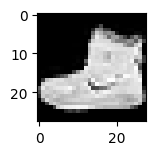

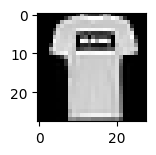

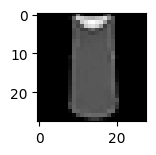

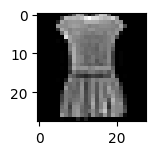

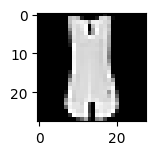

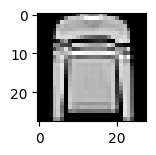

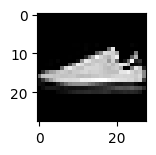

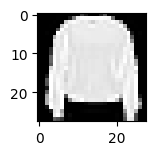

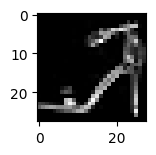

In [21]:
# plot first few images
import matplotlib.pyplot as plt

for i in range(9):
    # define subplot
    plt.subplot(330 + 1 +i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    # show the figure
    plt.show()

In [22]:
# preprocess the data for normalize it(scale the data)
X_train = X_train/255.0  # gray scale (0-255)
X_test = X_test/255.0

In [23]:
# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),       # Flaatten layer does not have neuron
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    # relu: display 0 to onward values  
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # softmax: bcz we have multiclass classification(0-9 classes)  
])

In [25]:
# compile the model
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# train the model
model.fit(X_train,y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test sccuracy: ', test_acc)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4919 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3733 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3370 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8858
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8706
Test sccuracy:  0.8705999851226807


In [26]:
# train the model
model.fit(X_train,y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test sccuracy: ', test_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2819 - accuracy: 0.8955
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.9002
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2574 - accuracy: 0.9036
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2470 - accuracy: 0.9078
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2373 - accuracy: 0.9121
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2303 - accuracy: 0.9139
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2229 - accuracy: 0.9161
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2142 - accuracy: 0.9200
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2103 - accuracy: 0.9214
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3373 

In [27]:
# Make prediction with the model
predictions = model.predict(X_test)

# Print the shape of the prediction array
print(predictions.shape)

# Print the first 10 predictions
print(predictions[:10])

# Convert the predicrion to class labels
class_labels = [tf.argmax(prediction) for prediction in predictions]

# Print the first class labels
print(class_labels[:10])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[2.03080641e-09 2.91409050e-11 1.38702494e-10 2.56750676e-10
  1.04027995e-12 2.82818364e-05 2.51699794e-09 3.64555279e-03
  1.14268220e-10 9.96326149e-01]
 [6.88926666e-05 4.63224955e-16 9.97767329e-01 1.10112088e-08
  1.72015815e-03 3.12538705e-13 4.43680299e-04 1.19958178e-22
  1.03166546e-14 2.74551052e-13]
 [4.01470468e-10 1.00000000e+00 2.99385842e-12 2.40778952e-09
  5.56981371e-11 7.60520033e-21 5.72818237e-10 1.26089578e-31
  6.53109091e-14 1.30506245e-22]
 [3.01564995e-10 9.99999642e-01 4.93588590e-12 3.87844864e-07
  1.48972679e-09 8.48363222e-20 2.39933140e-08 4.88650104e-27
  1.24426999e-12 3.09279750e-18]
 [1.67468235e-01 4.80870384e-08 9.09378659e-03 2.18993824e-04
  3.07753705e-03 3.18413407e-09 8.20137501e-01 1.09809210e-10
  4.00126964e-06 4.33604619e-09]
 [5.96473328e-05 9.99929547e-01 1.80136254e-07 8.11904044e-07
  6.30796961e-08 8.31282793e-15 9.72132057e-06 1.03004873e-26
  5.07994424e-10 3.02603

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5058 - accuracy: 0.8217 - val_loss: 0.3921 - val_accuracy: 0.8630
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3819 - accuracy: 0.8614 - val_loss: 0.3811 - val_accuracy: 0.8574
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3403 - accuracy: 0.8770 - val_loss: 0.3486 - val_accuracy: 0.8796
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3155 - accuracy: 0.8840 - val_loss: 0.3239 - val_accuracy: 0.8800
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2988 - accuracy: 0.8893 - val_loss: 0.3224 - val_accuracy: 0.8838
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2801 - accuracy: 0.8958 - val_loss: 0.3206 - val_accuracy: 0.8808
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2698 - accuracy: 0.8990 - val_loss: 0.3277 - val_accuracy:

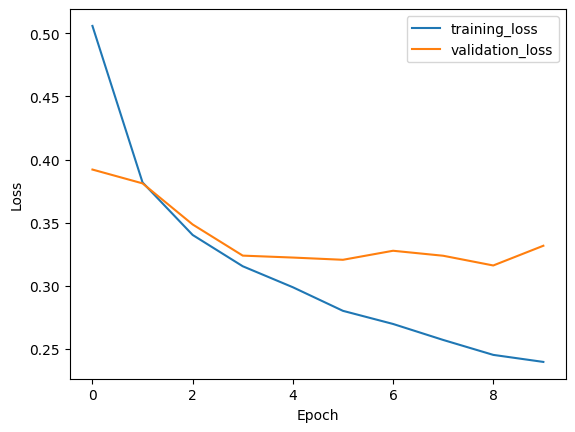

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# preprocess the data to normalize it (scale the data)
X_train = train_images / 255.0  # gray scale (0-255)
X_test = test_images / 255.0

# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),       # Flatten layer does not have neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu),    # relu: display 0 to onward values
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # softmax: because we have multiclass classification (0-9 classes)
])

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# split the training data into training and validation sets (using the already loaded data)
X_val = X_train[:5000]
y_val = train_labels[:5000]
X_train = X_train[5000:]
y_train = train_labels[5000:]

# train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# plot the training and validation loss
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


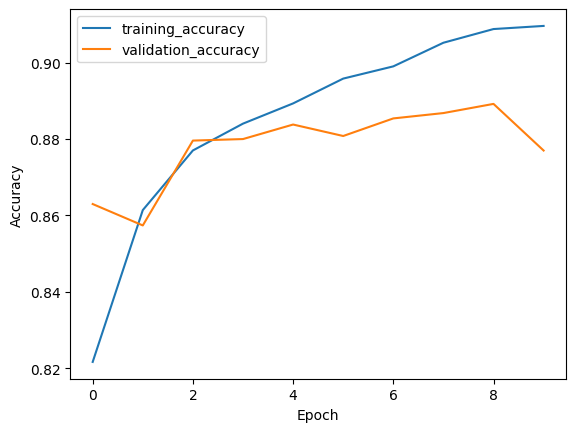

In [33]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test sccuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.8682
Test sccuracy:  0.8682000041007996


___
## August 01, 2023